<a href="https://colab.research.google.com/github/mhdiham/mhdiham/blob/main/Modelling-CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <img src="https://orbitfutureacademy.id/wp-content/uploads/2023/03/OFA-Logo-01.png" alt="Kampus Merdeka" width="150" height="30">  <img src="https://rmol.id/images/berita/normal/2022/03/819064_02405701032022_kampus_merdeka.jpg" alt="Logo Orbit" width="150" height="70">



📈 CUSTOMER CHURN PREDICTION 📉





<img src="https://i.ytimg.com/vi/BX1nZGLvw1Q/maxresdefault.jpg" alt="Logo Orbit" width="550" height="200">

### Libraries and Data Information

In [ ]:
pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier

import os
for dirname, _, filenames in os.walk('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier


The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

**Feature Information**

- customerID: A unique ID that identifies each customer.,

- gender: The customer’s gender - Male, Female,

- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0),

- Partner: Whether the customer has a partner or not (Yes, No),

- Dependents: Whether the customer has dependents or not (Yes, No),

- tenure: Number of months the customer has stayed with the company,

- PhoneService: Whether the customer has a phone service or not (Yes, No),

- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service),

- InternetService: Customer’s internet service provider (DSL, Fiber optic, No),

- OnlineSecurity: Whether the customer has online security or not (Yes, No, No
internet service),

- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service),

- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service),

- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service),

- Whether the customer has streaming TV or not (Yes, No, No internet service),

- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service),

- Contract: The contract term of the customer (Month-to-month, One year, Two year),

- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No),

- PaymentMethod: The customer’s payment method (Electronic check, Mailed check,

- Bank transfer (automatic), Credit card (automatic)),

- MonthlyCharges: The amount charged to the customer monthly,

- TotalCharges: The total amount charged to the customer,

- Churn: Whether the customer churned or not (Yes or No).

### Read and Check Data

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Let's create a more detailed table for our features

# Create an empty list to store the output data
output_data = []

for col in df.columns:

    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,customerID,7043,-,object
1,gender,2,"[Female, Male]",object
2,SeniorCitizen,2,"[0, 1]",int64
3,Partner,2,"[Yes, No]",object
4,Dependents,2,"[No, Yes]",object
5,tenure,73,-,int64
6,PhoneService,2,"[No, Yes]",object
7,MultipleLines,3,"[No phone service, No, Yes]",object
8,InternetService,3,"[DSL, Fiber optic, No]",object
9,OnlineSecurity,3,"[No, Yes, No internet service]",object


In [ ]:
# SeniorCitizen is actually categorical value
# The target variable contains a string value, but it must be integer in the form of 0-1

df = df.replace({"SeniorCitizen": {0: "No", 1: "Yes"},
                 "Churn": {"No": 0, "Yes": 1}
                 })

In [ ]:
# Let's select our values in categorical columns and look at the bar chart

features = []

for i in df.columns:
    unique_values = df[i].nunique()
    if unique_values < 5:
        features.append(i)

In [ ]:
# let's remove the target variable
features.remove('Churn')

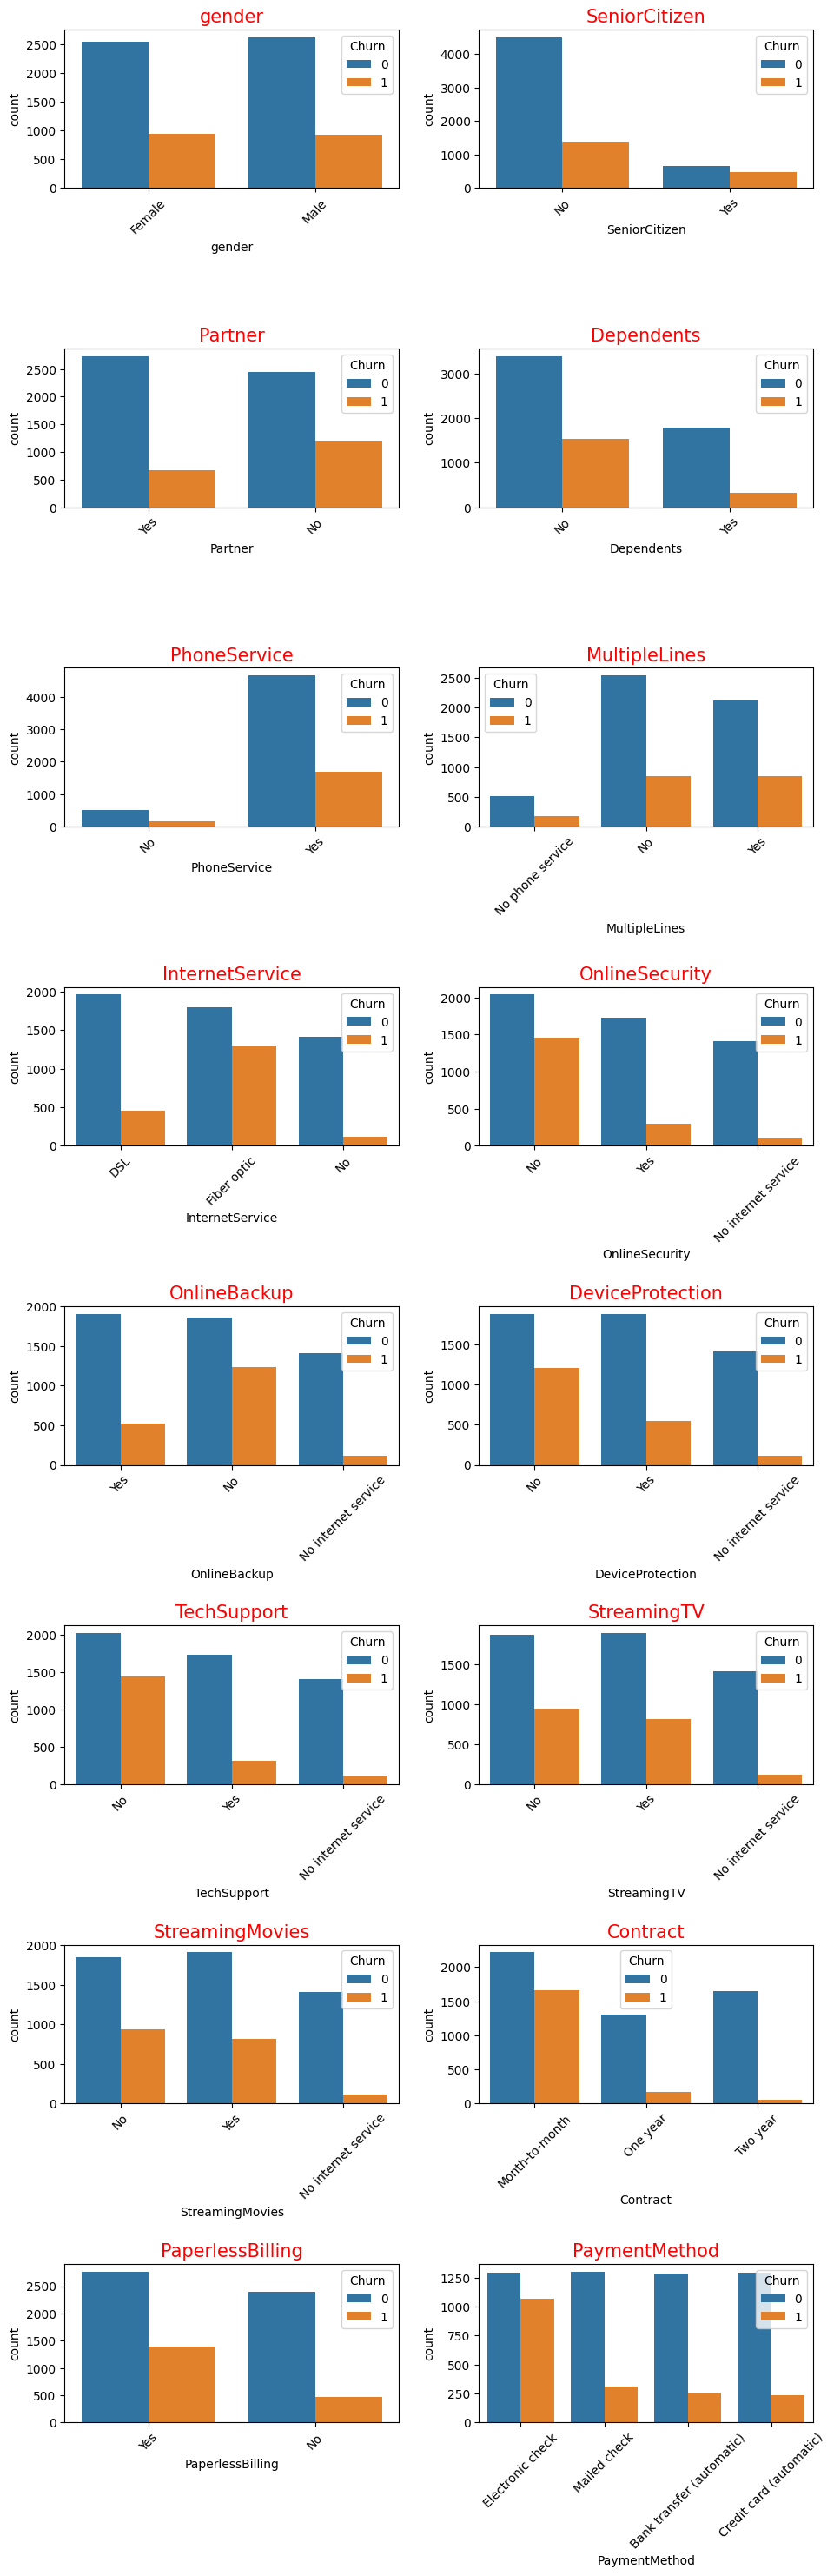

In [ ]:
# Let's look at the distribution of the columns we have selected with a bar chart

plt.figure(figsize=(10, 30))

for i, column in enumerate(features):
    plt.subplot((len(features) + 1) // 2, 2, i + 1)

    sns.countplot(data=df, x=column, hue="Churn")

    plt.title(column, fontsize = 15, color = "red")
    plt.xticks(rotation=45)

plt.tight_layout(pad=2.0)
plt.show()

### The Relationship Between Categorical Features

The chi-square test is a statistical test used to assess whether a relationship exists between two categorical variables. The chi-square test measures the difference between observations and expected values in a sample and attempts to determine whether this difference is statistically significant. However, the chi-square test does not measure the strength or nature of the relationship.

Cramer's V is a measure used to quantify the strength of association between categorical variables. Cramer's V is calculated from the chi-square test results and takes a value between 0 and 1. The closer the value, the stronger the relationship.

In summary, both methods have their advantages and limitations. The chi-square test is a simple and common method for assessing independence or association. However, it can only tell whether the relationship exists and cannot measure the strength or nature of the relationship. Cramer's V, on the other hand, can assess the strength and nature of the relationship, but relies on the results of the chi-square test to determine whether there is independence or association.

In [ ]:
# let's just keep a list of the names of our categories with uniques below 5

cat_features = []
# Iterate through the columns except the target [Churn]
for col in df.columns[:-1]:
    # If the unique values is equal or below 5
    if df.loc[:, col].nunique() <= 5:
        # Append the column name into the categorical feature list
        cat_features.append(col)

cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Let's create a Cramer's V table based on the Chi-squared test

In [ ]:
from typing import Union, Tuple, List

def calculate_cramers_v(df: pd.DataFrame, cat_features: Union[List, Tuple]):

    # An empty DataFrame is created to store Cramer's V values
    cramer_v_corr = pd.DataFrame(np.zeros((len(cat_features), len(cat_features))),
                                 index=cat_features, columns=cat_features)

    # The following two loops hover over the categorical features to calculate the Cramer's V correlation for each pair of features.
    for i in range(len(cat_features)):
        for j in range(len(cat_features)):
            if i == j:
                cramer_v_corr.iloc[i, j] = 1.0
                # When we compare the same property, Cramer's V is assigned a value of 1
            else:
                crosstab = pd.crosstab(df[cat_features[i]], df[cat_features[j]])
                chi2, _, _, _ = chi2_contingency(crosstab)
                n = crosstab.sum().sum()
                k = min(crosstab.shape)-1
                cramer_v_corr.iloc[i, j] = np.sqrt(chi2 / (n*k))
                # To calculate Cramer's V (cramer_v) we use the chi-square value (chi2), the sample size (n) and the number of categories (k)
                # We assign the obtained value to the corresponding cell in the cramer_v_corr DataFrame.
    return cramer_v_corr

In [ ]:
# Heatmap
def heat_plot(df: pd.DataFrame):

    plt.figure(figsize=(18,10))
    mask = np.zeros_like(a=df,
                         dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        ax = sns.heatmap(data=df,
                        mask=mask,
                        annot = True)
    plt.show()

In [ ]:
calculate_cramers_v(df=df, cat_features=cat_features)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
gender,1.000000,0.001488,0.001524,0.010207,0.006008,0.009452,0.011320,0.017025,0.013798,0.006029,0.009722,0.008844,0.010641,0.008153,0.011465,0.018646
SeniorCitizen,0.001488,1.000000,0.016093,0.210765,0.007925,0.146643,0.265324,0.211070,0.182774,0.183071,0.224050,0.185586,0.188962,0.143868,0.156138,0.195985
Partner,0.001524,0.016093,1.000000,0.452366,0.017225,0.143898,0.000907,0.152010,0.153337,0.166568,0.127642,0.137343,0.129574,0.296039,0.014588,0.162762
Dependents,0.010207,0.210765,0.452366,1.000000,0.001238,0.025094,0.180267,0.194579,0.162760,0.157570,0.182377,0.147082,0.141335,0.244212,0.111062,0.150744
PhoneService,0.006008,0.007925,0.017225,0.001238,1.000000,1.000000,0.452425,0.176272,0.172818,0.172317,0.176977,0.180434,0.177520,0.003976,0.016016,0.010297
MultipleLines,0.009452,0.146643,0.143898,0.025094,1.000000,1.000000,0.396726,0.229608,0.245163,0.246342,0.230162,0.261791,0.262356,0.080408,0.166341,0.166930
InternetService,0.011320,0.265324,0.000907,0.180267,0.452425,0.396726,1.000000,0.724466,0.707184,0.707108,0.722904,0.717099,0.716008,0.206921,0.378427,0.313123
OnlineSecurity,0.017025,0.211070,0.152010,0.194579,0.176272,0.229608,0.724466,1.000000,0.718434,0.717291,0.733071,0.707788,0.708208,0.301349,0.341800,0.304959
OnlineBackup,0.013798,0.182774,0.153337,0.162760,0.172818,0.245163,0.707184,0.718434,1.000000,0.719125,0.719834,0.714699,0.713682,0.258572,0.321046,0.282517
DeviceProtection,0.006029,0.183071,0.166568,0.157570,0.172317,0.246342,0.707108,0.717291,0.719125,1.000000,0.726485,0.733661,0.736047,0.296976,0.321631,0.287021


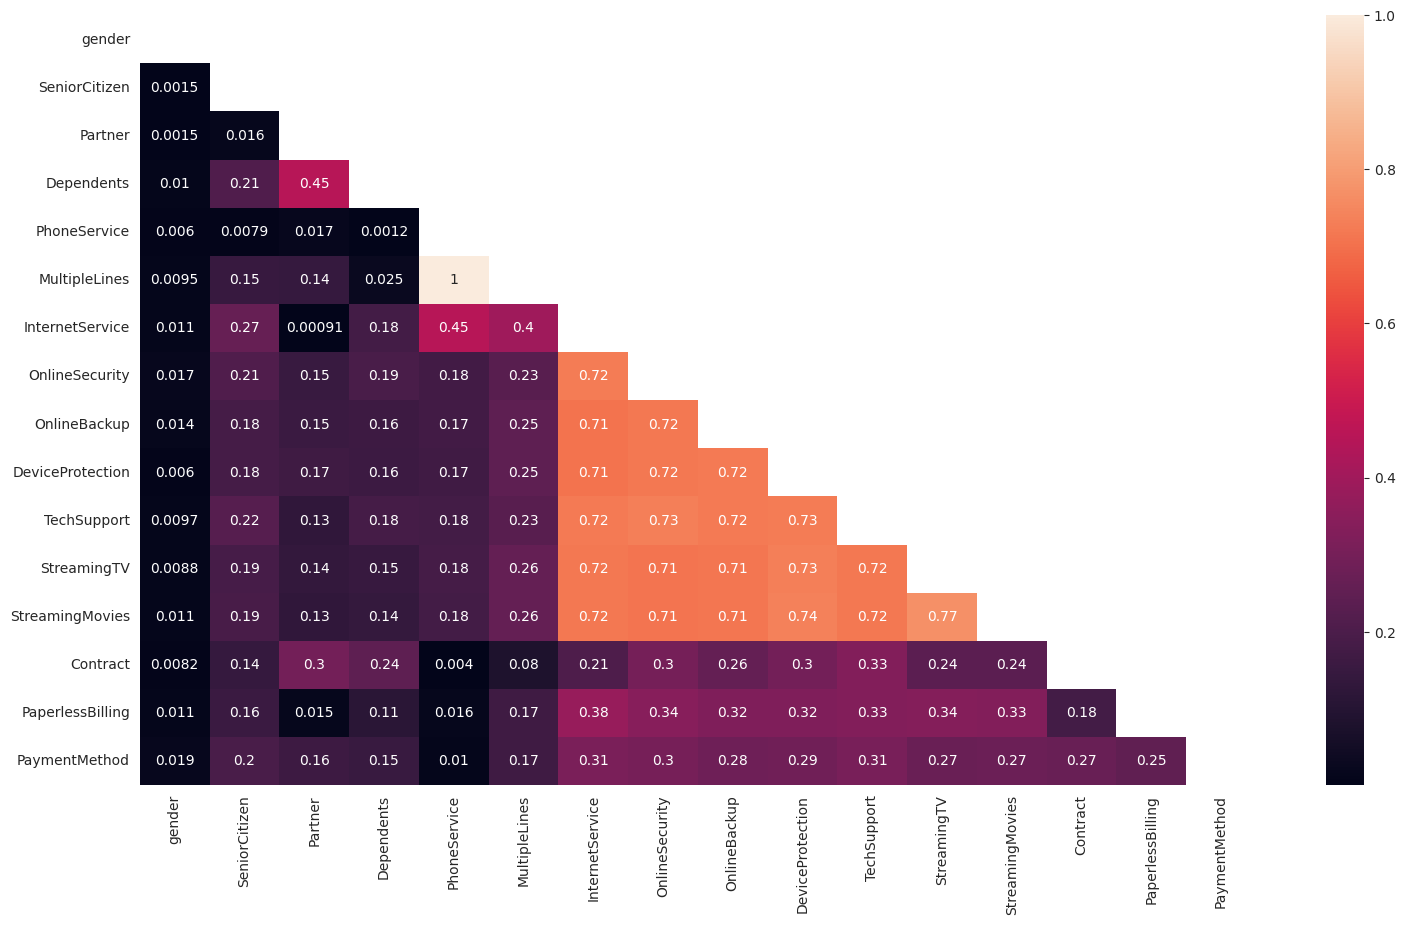

In [ ]:
heat_plot(df=calculate_cramers_v(df=df, cat_features=cat_features))

- As seen above, there is a high correlation between some features. The highest correlation is observed between MultipleLines and PhoneService. In general, multicollinearity between independent variables will result in less reliable statistical inferences. It will also lead to overfittig in our estimation model.

- Now let's take out the highly correlated features and look at our heatmap graph again

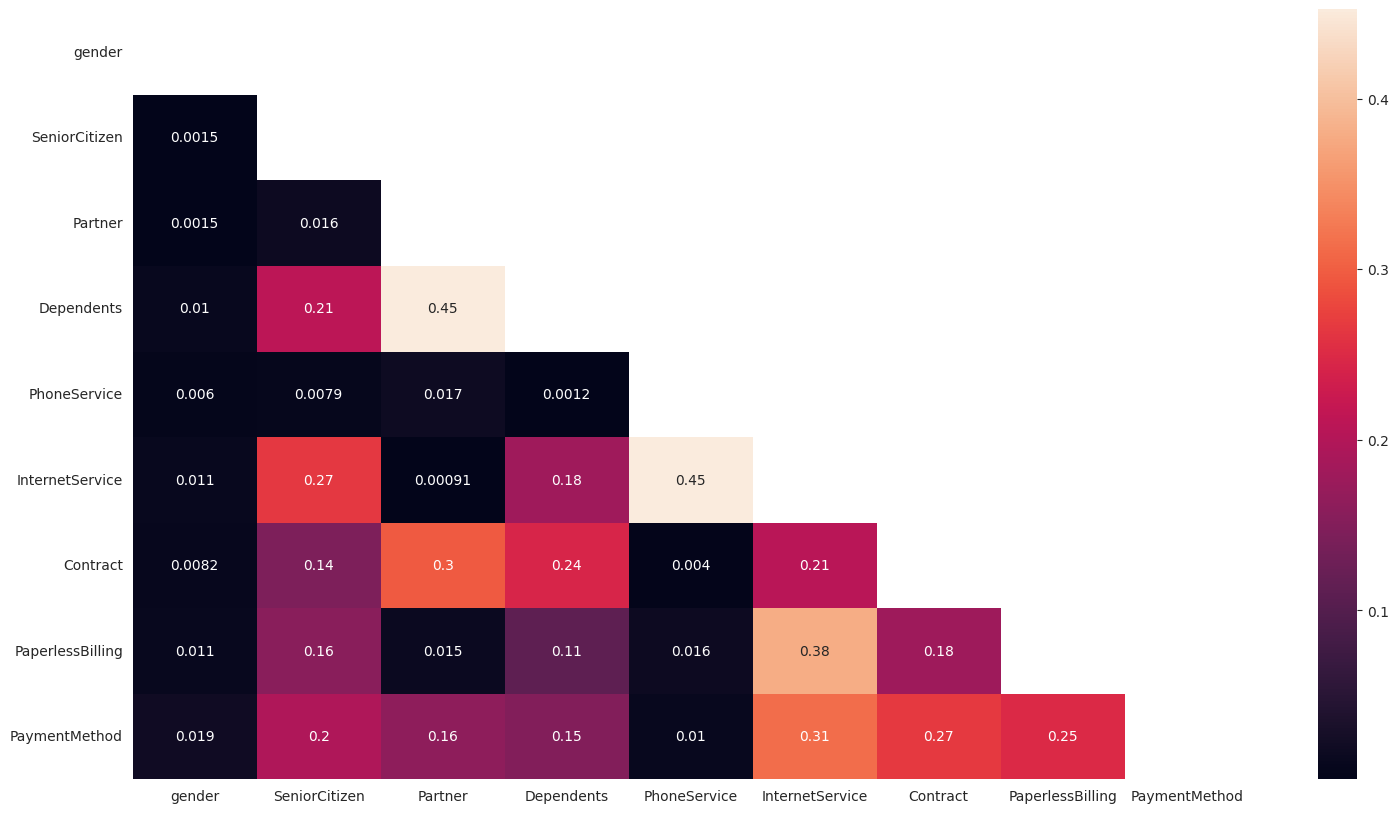

In [ ]:
# Copy the categorical features list in a name `cat_features_cp`
cat_features_cp = cat_features.copy()
# Declare a list named `cols2drop` that represent
# the list of features that are going to be dropped
cols2drop = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]
# Iterate through the columns that are going to be dropped
for col in cols2drop:
    # Delete the feature from the copied categorical feature list
    cat_features_cp.remove(col)

# Heatmap plot
heat_plot(df=calculate_cramers_v(df=df,
                                 cat_features=cat_features_cp))

In [ ]:
# Target
target = "Churn"

# To drop
features_to_drop = ["customerID","Churn"]

# To avoid multicollinearity, we can remove these features, but instead of removing them, we can apply PCA to them
# PCA features
features_to_pca = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]
# Need to be converted to a dummy variable
features_to_dummy = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "InternetService",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

### The Relationship Between Numerical Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- As seen TotalCharges is of object type but must be numeric. Other numeric properties are MonthlyCharges and tenure

In [ ]:
df.TotalCharges.dtype

dtype('O')

In [ ]:
df.loc[:, "TotalCharges"] = pd.to_numeric(arg=df.TotalCharges,errors="coerce")

# Drop if any NaN value occured, then reset the index
df = df.dropna().reset_index(drop=True)

In [ ]:
df.TotalCharges.dtype

dtype('float64')

In [ ]:
df.shape

(7032, 21)

- By subtracting the missing values during the conversion, the number of rows became 7043 ( 11 rows were removed )

In [ ]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


- We have 3 numeric features besides the target variable

- Using the vif method below, we can observe whether there is multicollinearity between the data among the numerical features.

- VIF (Variance Inflation Factor) is a statistical measure used in multiple linear regression analysis. VIF values measure the relationship of one independent variable with other independent variables and help to identify multicollinearity or correlation between multiple independent variables in a multiple linear regression model.

In [ ]:
def calculate_vif(df: pd.DataFrame, target: str):
    # Select only numerical features except the target
    X = df.loc[:, df.columns != target].select_dtypes(include=np.number)

    # Declare an empty df for VIF calculation
    vif = pd.DataFrame()
    # Insert the numerical features into the "Feature" column
    vif["Feature"] = X.columns
    # Calculate the VIF for each numerical column
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Return results
    return vif


calculate_vif(df=df, target=target)

,Feature,VIF
0,tenure,6.332432
1,MonthlyCharges,3.361075
2,TotalCharges,8.079181


- If the VIF value converges to 1, the independent variable is only weakly correlated with other independent variables.

- However, if the VIF value is above a certain threshold value (usually 5 or 10), it indicates a multicollinearity problem and the effect of the independent variable in the model may not be reliable.

- We will continue to use these features because the number of numeric features is small and our vif value is not very high

In [ ]:
# Let's see how the vif values would change if I removed the TotalCharges feature

df_cp = df.copy()

calculate_vif(df=df_cp.drop(columns=["TotalCharges"]), target=target)

,Feature,VIF
0,tenure,2.615492
1,MonthlyCharges,2.615492


TotalCharges distribution with hist


<Figure size 900x300 with 0 Axes>

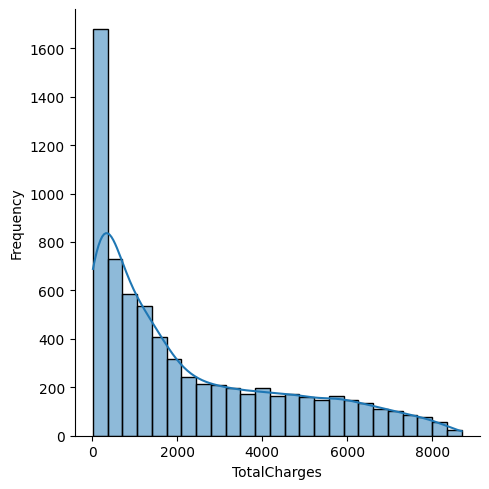

tenure distribution with hist


<Figure size 900x300 with 0 Axes>

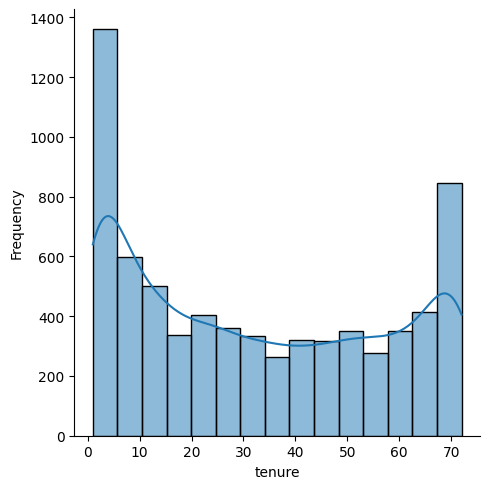

MonthlyCharges distribution with hist


<Figure size 900x300 with 0 Axes>

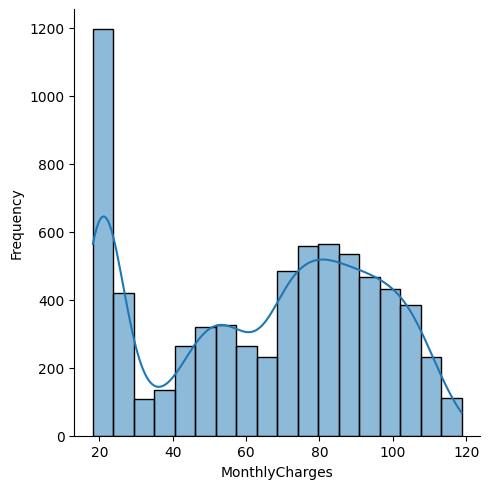

In [ ]:
# Let's look at the distributions of our numerical features

for variable in ["TotalCharges","tenure","MonthlyCharges"]:
    plt.figure(figsize = (9,3))
    sns.displot(df[variable],kde=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    print("{} distribution with hist".format(variable))
    plt.show()

### Get Dummies & PCA

In [ ]:
df_pca = df[features_to_pca]
df_pca.head()

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No phone service,No,Yes,No,No,No,No
1,No,Yes,No,Yes,No,No,No
2,No,Yes,Yes,No,No,No,No
3,No phone service,Yes,No,Yes,Yes,No,No
4,No,No,No,No,No,No,No


In [ ]:
df_pca = pd.get_dummies(data=df_pca, drop_first=True)

df_pca.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train-Test Split & StandardScaler

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca)


result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
result

,PC1,PC2
0,-0.191744,0.947946
1,-0.336131,0.582715
2,-0.323910,0.720289
3,-0.559212,0.508323
4,0.057179,1.027441
...,...,...
7027,-1.145137,-0.855122
7028,-1.000072,-0.765399
7029,-0.152470,1.065448
7030,-0.078600,0.595740


In [ ]:
# Drop not needed columns
y = df.loc[:,"Churn"]
df = df.drop(columns=features_to_drop)  # ["customerID","Churn"]
df = df.drop(columns=features_to_pca)   # we remove features  due to multicollinearity

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
df = pd.get_dummies(data=df, columns=features_to_dummy, drop_first=True)

df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,1,0,0,0,1,0,1,0


In [ ]:
# Let's add PC1 and PC2 features to df and assign them as df_pca

df_pca = pd.concat([df, result], axis=1)
df_pca.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PC1,PC2
0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,1,0,-0.191744,0.947946
1,34,56.95,1889.50,1,0,0,0,1,0,0,1,0,0,0,0,1,-0.336131,0.582715
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,1,0,0,1,-0.323910,0.720289
3,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.559212,0.508323
4,2,70.70,151.65,0,0,0,0,1,1,0,0,0,1,0,1,0,0.057179,1.027441


In [ ]:
df.shape

(7032, 16)

In [ ]:
df_pca.shape

(7032, 18)

In [ ]:
# df

X_train, X_test, y_train, y_test = train_test_split(df.values, y,
                                                    test_size=0.25,
                                                    random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# df_pca (PC1 and PC2 added)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.values, y,
                                                    test_size=0.25,
                                                    random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_pca)
X_test = scaler.transform(X_test_pca)

### Modelling

LazyClassifier

In [ ]:
# LazyClassifier with df
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, random_state=43)
# Start training
models1, predictions = clf.fit(X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)

100%|██████████| 29/29 [00:12<00:00,  2.25it/s]

[LightGBM] [Info] Number of positive: 1440, number of negative: 3834
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273038 -> initscore=-0.979266
[LightGBM] [Info] Start training from score -0.979266


In [ ]:
models1.sort_values(by="Accuracy",
                   ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.82,0.72,0.72,0.81,2.42
AdaBoostClassifier,0.82,0.72,0.72,0.81,0.60
LinearSVC,0.82,0.72,0.72,0.81,0.52
LogisticRegression,0.82,0.72,0.72,0.81,0.07
RidgeClassifierCV,0.82,0.71,0.71,0.81,0.04
RidgeClassifier,0.82,0.71,0.71,0.81,0.03
SVC,0.81,0.70,0.70,0.80,1.17
SGDClassifier,0.81,0.66,0.66,0.79,0.12
LinearDiscriminantAnalysis,0.81,0.71,0.71,0.80,0.07


In [ ]:
models2.sort_values(by="Accuracy",
                   ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.82,0.72,0.72,0.81,5.50
AdaBoostClassifier,0.82,0.72,0.72,0.81,2.14
LinearSVC,0.82,0.72,0.72,0.81,1.47
LogisticRegression,0.82,0.72,0.72,0.81,0.37
RidgeClassifierCV,0.82,0.71,0.71,0.81,0.10
RidgeClassifier,0.82,0.71,0.71,0.81,0.08
SVC,0.81,0.70,0.70,0.80,2.29
SGDClassifier,0.81,0.66,0.66,0.79,0.15
LinearDiscriminantAnalysis,0.81,0.71,0.71,0.80,0.09


- As can be seen from the table above, the dataframe to which we added the pca features gave better results.
- Let's perform hyperparameter search on the model with the best result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

# Create a LogisticRegression object
logreg = LogisticRegression()

# Define the hyperparameter search space
param_dist = {"C": loguniform(1e-5, 100),
              "penalty": ["l1", "l2", "elasticnet", "none"],
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "max_iter": [100, 500, 1000, 2000]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logreg,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring="accuracy",
                                   cv=5,
                                   random_state=43)

# Fit the RandomizedSearchCV to the data
random_search.fit(X=X_train_pca, y=y_train_pca)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

# Retrieve the best model
best_logreg = random_search.best_estimator_
# Predict on the test data
y_pred = best_logreg.predict(X_test_pca)
# Calculate accuracy
accuracy = accuracy_score(y_test_pca, y_pred)
# Print accuracy
print("Accuracy:", round(accuracy, 2))

Best Hyperparameters:  {'C': 3.885484759123094, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.82


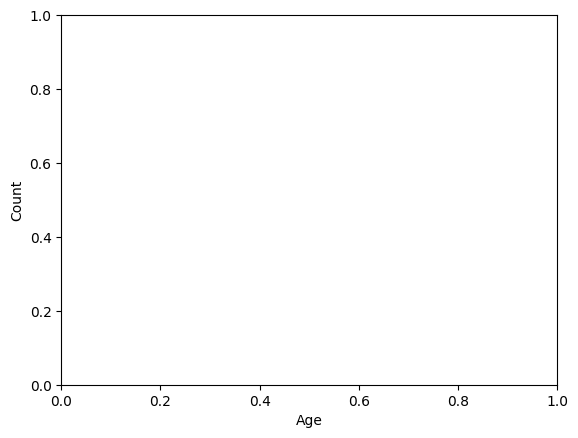

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create a histogram of customer age
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


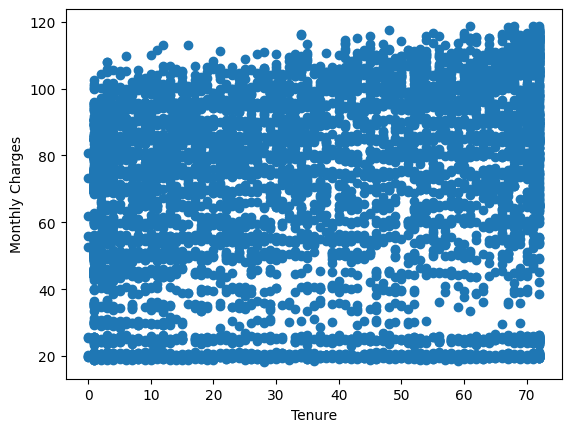

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create a scatter plot of customer tenure and monthly charges
plt.scatter(df['tenure'], df['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

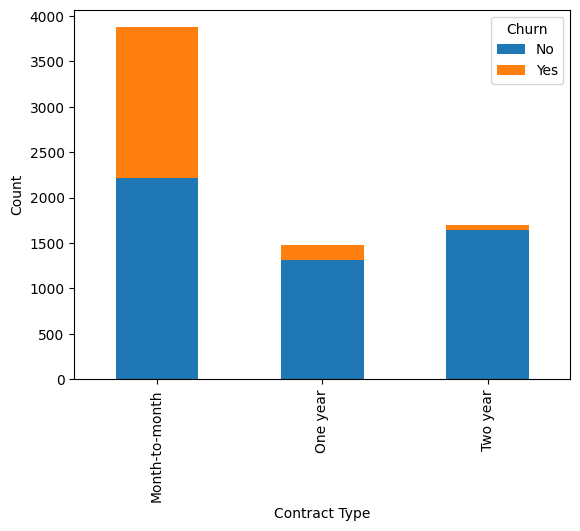

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create a bar chart of customer churn based on contract type
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
churn_by_contract.plot(kind='bar', stacked=True)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

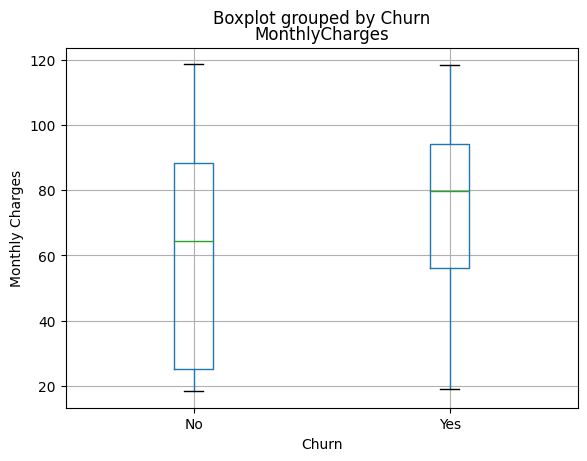

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create a box plot of customer churn based on subscription price
df.boxplot(column='MonthlyCharges', by='Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

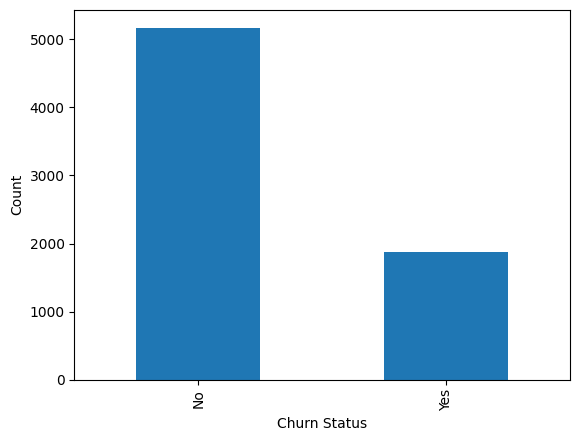

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create a bar chart of customer churn based on churn status
churn_by_status = df.groupby(['Churn']).size()
churn_by_status.plot(kind='bar')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

### Multiple Machine Learning Model Evaluations and Testing

1) SUPPORT VECTOR CLASSIFIER (SVC)

SVM accuracy is : 0.8111490329920364
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1329
           1       0.65      0.49      0.56       429

    accuracy                           0.81      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758

------------------------------------------------------------


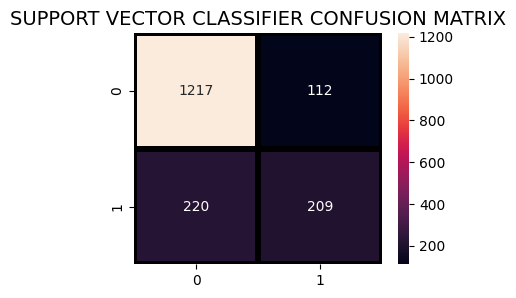

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print('-'*60)
print(classification_report(y_test, predict_y))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

2) RANDOM FOREST CLASSIFIER

0.8117178612059158
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1329
           1       0.65      0.50      0.56       429

    accuracy                           0.81      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758

------------------------------------------------------------


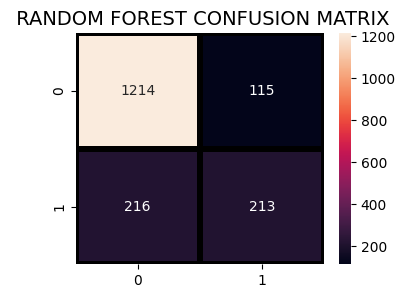

------------------------------------------------------------


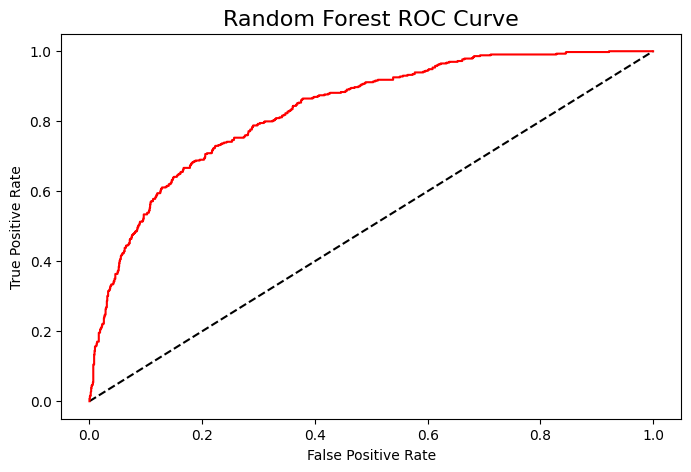

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30

print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)


plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

3) LOGISTIC REGRESSION

Logistic Regression accuracy is : 0.8179749715585893
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1329
           1       0.66      0.53      0.59       429

    accuracy                           0.82      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.81      0.82      0.81      1758

------------------------------------------------------------


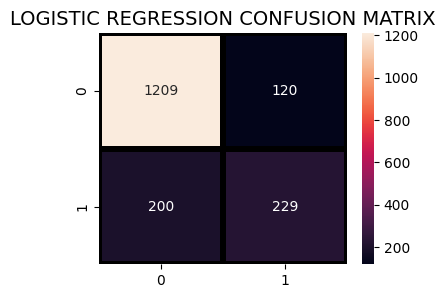

------------------------------------------------------------


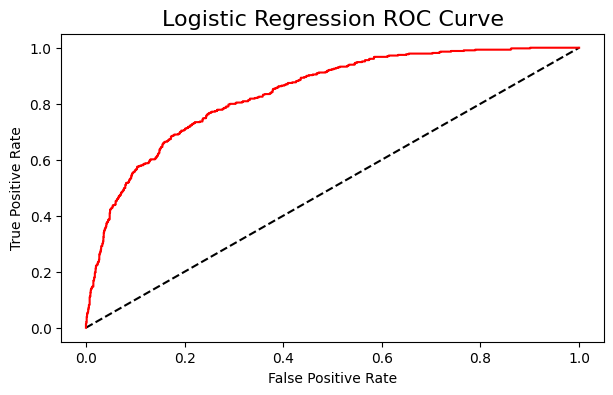

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

4) DECISION TREE CLASSIFIER

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7377701934015927
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1329
           1       0.47      0.51      0.49       429

    accuracy                           0.74      1758
   macro avg       0.65      0.66      0.66      1758
weighted avg       0.75      0.74      0.74      1758



5) ADABOOST CLASSIFIER

AdaBoost Classifier accuracy
0.8191126279863481
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1329
           1       0.66      0.53      0.59       429

    accuracy                           0.82      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.81      0.82      0.81      1758



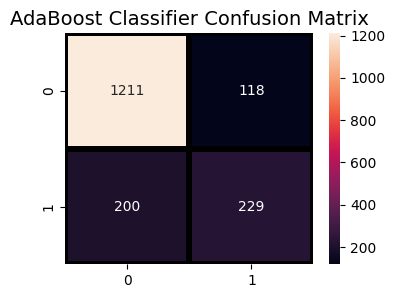

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
print(metrics.accuracy_score(y_test, a_preds))


print(classification_report(y_test, a_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()